# SETUP
- - -

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import tensorflow as tf

# _TENSOR FLOW_

### Symbol

In [ ]:
x = tf.Variable(1.0)
y = tf.Variable(2.0)

type(x), type(y)

In [ ]:
z = x + y

In [ ]:
type(z)

In [ ]:
u = tf.log(z)
type(u)

### 세션

In [ ]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
print(sess.run(z))
print(sess.run(u))
sess.close()

### 미분 / 최적화

In [ ]:
f = x ** 2
fx = tf.gradients(f, [x])

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(f))
    print(sess.run(fx))

### tensorboard 용 로그 생성

### 예제 1 : 퍼셉트론
- - -

### 연습 문제 1
- - - 

- y값은 0과 1이라는 값만 가진다.
- 활성화 함수는 로지스틱 함수를 사용한다.
- 코스트 함수는 다음과 같은 오차 제곱 합수를 사용한다.

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
idx = np.in1d(iris.target, [0, 2]) 
X_data = iris.data[idx, 0:2]
y_data = (iris.target[idx] / 2)[:, np.newaxis]

In [ ]:
np.random.seed(0)
w = tf.Variable(1e-3 * np.random.randn(2, 1))
b = tf.Variable(1e-3 * np.random.randn(1)[0])
d = 1 / (1 + tf.exp(- tf.matmul(X_data, w) - b))

cost = tf.reduce_sum((y_data - d)**2)
optimizer = tf.train.GradientDescentOptimizer(1e-2)
train = optimizer.minimize(cost)

In [ ]:
sess = tf.Session()

w_summary = tf.summary.histogram("w", w)
b_summary = tf.summary.scalar("b", b)
d_summary = tf.summary.histogram("d", d)
cost_summary = tf.summary.scalar("cost", cost)
merged = tf.summary.merge([w_summary, b_summary, d_summary, cost_summary])

In [ ]:
init = tf.global_variables_initializer()
sess.run(init)

writer = tf.summary.FileWriter("/Users/quartz/test/", sess.graph)

In [ ]:
for i in range(1000):
    sess.run(train)
    summary = sess.run(merged)
    writer.add_summary(summary, i)
    if i % 10 == 0:
        print("{:4d}: ".format(i), sess.run(cost))

In [ ]:
y_pred = sess.run(tf.round(d))

In [ ]:
sess.close()

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_data, y_pred)

# _KERAS_

In [ ]:
%%time

from keras.datasets import mnist

In [ ]:
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

In [ ]:
print(X_train0.shape, X_train0.dtype)

In [ ]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255

### 연습 문제 1
- - -

- 150개 전부 분류(트레이닝 퍼포먼스 위주)
- 결과물 : 코드. accuracy trainning plot, 최종 confusion matrix

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
print(X.shape, X.dtype)
print(y.shape, y.dtype)

(150, 4) float64
(150,) int64


In [5]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y, 3)

Using TensorFlow backend.


In [6]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(8, input_dim=4, activation="sigmoid"))
model.add(Dense(3, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.3), loss='mean_squared_error', metrics=["accuracy"])

In [11]:
%%time

hist = model.fit(X, y_train, epochs=100, batch_size=30, verbose=2)

Epoch 1/100
 - 0s - loss: 0.1036 - acc: 0.9133
Epoch 2/100
 - 0s - loss: 0.1031 - acc: 0.9333
Epoch 3/100
 - 0s - loss: 0.1026 - acc: 0.9333
Epoch 4/100
 - 0s - loss: 0.1025 - acc: 0.9400
Epoch 5/100
 - 0s - loss: 0.1020 - acc: 0.9067
Epoch 6/100
 - 0s - loss: 0.1010 - acc: 0.9600
Epoch 7/100
 - 0s - loss: 0.1009 - acc: 0.9267
Epoch 8/100
 - 0s - loss: 0.1005 - acc: 0.9533
Epoch 9/100
 - 0s - loss: 0.0994 - acc: 0.9600
Epoch 10/100
 - 0s - loss: 0.0996 - acc: 0.9067
Epoch 11/100
 - 0s - loss: 0.0988 - acc: 0.9600
Epoch 12/100
 - 0s - loss: 0.0980 - acc: 0.9533
Epoch 13/100
 - 0s - loss: 0.0984 - acc: 0.9333
Epoch 14/100
 - 0s - loss: 0.0976 - acc: 0.9333
Epoch 15/100
 - 0s - loss: 0.0970 - acc: 0.9467
Epoch 16/100
 - 0s - loss: 0.0967 - acc: 0.9333
Epoch 17/100
 - 0s - loss: 0.0960 - acc: 0.9667
Epoch 18/100
 - 0s - loss: 0.0953 - acc: 0.9600
Epoch 19/100
 - 0s - loss: 0.0949 - acc: 0.9467
Epoch 20/100
 - 0s - loss: 0.0944 - acc: 0.9667
Epoch 21/100
 - 0s - loss: 0.0940 - acc: 0.9600
E

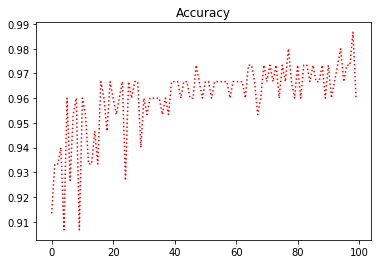

In [12]:
plt.plot(hist.history['acc'], 'r:')
plt.title("Accuracy")
plt.show()

In [13]:
y_pred = model.predict_classes(X, 3)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  0, 50]])

### Olivetti

In [16]:
from sklearn.datasets import fetch_olivetti_faces

In [17]:
oliv = fetch_olivetti_faces()

In [18]:
X2 = oliv.data
y2 = oliv.target

X2.shape, y2.shape

((400, 4096), (400,))

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(oliv.data, oliv.target, test_size=0.5)

In [23]:
X_train.shape, X_test.shape

((200, 4096), (200, 4096))

In [24]:
y_train.shape, y_test.shape

((200,), (200,))